In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.linalg import pinv

# Exercice 1

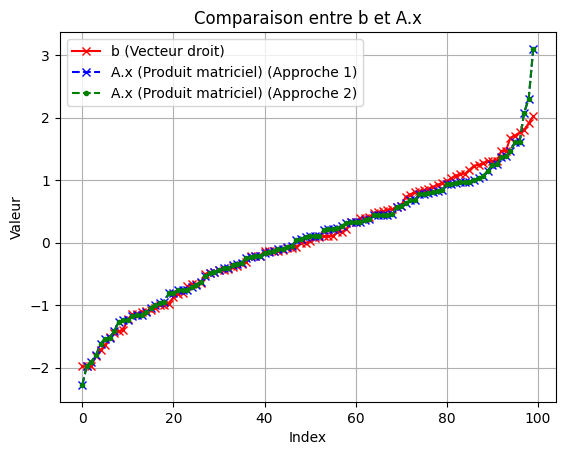

In [3]:
def circulant_matrix(n):
    """
    Génère une matrice circulante avec une première ligne aléatoire.
    """
    first_row = np.random.randint(1, 11, n)    
    circulant_matrix = np.zeros((n, n), dtype=np.float64)
    
    for i in range(n):
        for j in range(n):
            circulant_matrix[i, j] = first_row[(j - i) % n]  # Décalage circulaire
        
    return circulant_matrix, first_row

n = 100  # Taille de la matrice

A, first_row = circulant_matrix(n)

b = np.random.normal(0, 1, n)


b_fft = np.fft.fft(b)

eigenvalues = np.fft.fft(first_row)
epsilon = 1e-4  # Un petit terme pour éviter la division par zéro
eigenvalues = np.where(np.abs(eigenvalues) < epsilon, epsilon, eigenvalues)
D = np.diag(eigenvalues)

y_fft_1 = b_fft / eigenvalues
y_fft_2 = np.linalg.solve(D,b_fft)


x_fft_1 = np.real(np.fft.ifft(y_fft_1))
x_fft_2 = np.real(np.fft.ifft(y_fft_2))

sorted_sol_fft1 = sorted(A @ x_fft_1)
sorted_sol_fft2 = sorted(A @ x_fft_2)
sorted_b = sorted(b)

plt.plot(range(n), sorted_b, label="b (Vecteur droit)", marker='x', linestyle='-', color='red')
plt.plot(range(n), sorted_sol_fft1, label="A.x (Produit matriciel) (Approche 1)", marker='x', linestyle='--', color='blue')
plt.plot(range(n), sorted_sol_fft2, label="A.x (Produit matriciel) (Approche 2)", marker='.', linestyle='--', color='green')
plt.title("Comparaison entre b et A.x")
plt.xlabel("Index")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)

### Deux approches pour le calcul des valeurs propres

Deux approches équivalentes ont été mises en œuvre pour le calcul des valeurs propres :

1. **Approche analytique**  
   Cette méthode utilise la formule analytique suivante :  
   
   - $y_k = \frac{\tilde{b}_k}{\lambda_k}, \quad \text{pour } k = 0, 1, \dots, N-1, \quad \text{avec } \lambda_k \neq 0.
   $
   - En déduire $x_k = F^{-1} y_k \quad \text{pour } k = 0, 1, \dots, N-1$.

2. **Approche matricielle**  
   Cette méthode repose sur des calculs matriciels :  
   - Décomposer $ A $ dans la base de Fourier $ A = F^{-1} D F $.  
   - Poser $y = F x $ et $ D y = F b $.  
   - Résoudre $ y = D^{-1} F b$.  
   - En déduire $x = F^{-1} y $.

### Remarque :
Pour garantir l'exactitude des calculs, nous avons vérifié que le produit matriciel de la solution obtenue par la FFT avec la matrice 
𝑏
b reproduit, à quelques erreurs d'arrondi près, le vecteur second membre. Par ailleurs, étant donné que l'ordre des valeurs propres n'est pas connu a priori, un tri est nécessaire pour obtenir une représentation graphique claire et lisible.

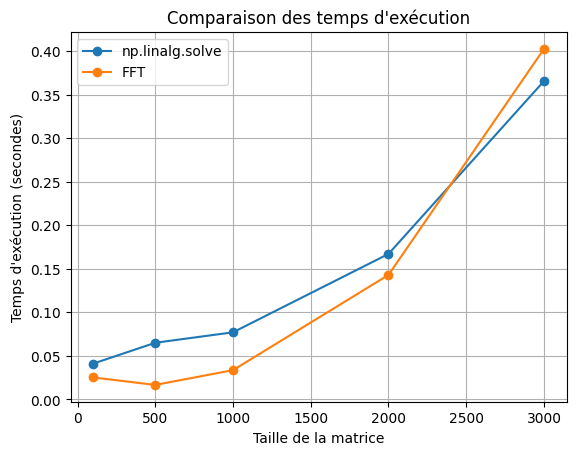

In [13]:
sizes = [100, 500, 1000, 2000, 3000]
solve_times = []
fft_times = []
errors_absolute = []
errors_relative = []

for n in sizes:
    A, first_row = circulant_matrix(n)
    b = np.random.normal(0, 1, n)

    # Solution exacte avec np.linalg.solve
    start_time = time.time()
    x_exact = np.linalg.solve(A, b)
    end_time = time.time()
    solve_times.append(end_time - start_time)

    # Résolution avec la méthode FFT
    start_time = time.time()

    eigvals = np.fft.fft(first_row).real

    D = np.diag(eigvals)

    b_fft = np.fft.fft(b).real

    # Résolution dans le domaine fréquentiel
    y_fft = np.linalg.solve(D,b_fft)

    # Transformation inverse FFT pour obtenir la solution dans le domaine spatial
    x_fft = np.fft.ifft(y_fft).real

    end_time = time.time()
    fft_times.append(end_time - start_time)

plt.plot(sizes, solve_times, label="np.linalg.solve", marker='o')
plt.plot(sizes, fft_times, label="FFT", marker='o')
plt.xlabel("Taille de la matrice")
plt.ylabel("Temps d'exécution (secondes)")
plt.legend()
plt.title("Comparaison des temps d'exécution")
plt.grid(True)
plt.show()


### Remarque :

Globalement, le temps de calcul pour la résolution par FFT est inférieur à celui de la résolution directe. Cela ne constitue pas une preuve formelle, mais donne une indication utile.

# Exercice 2

C:\Users\PC\AppData\Local\Temp\ipykernel_12048\2433417818.py:33: RuntimeWarning: divide by zero encountered in divide
  Cfp = Coeff / (k**2)
C:\Users\PC\AppData\Local\Temp\ipykernel_12048\2433417818.py:33: RuntimeWarning: invalid value encountered in divide
  Cfp = Coeff / (k**2)


<Figure size 1000x600 with 0 Axes>

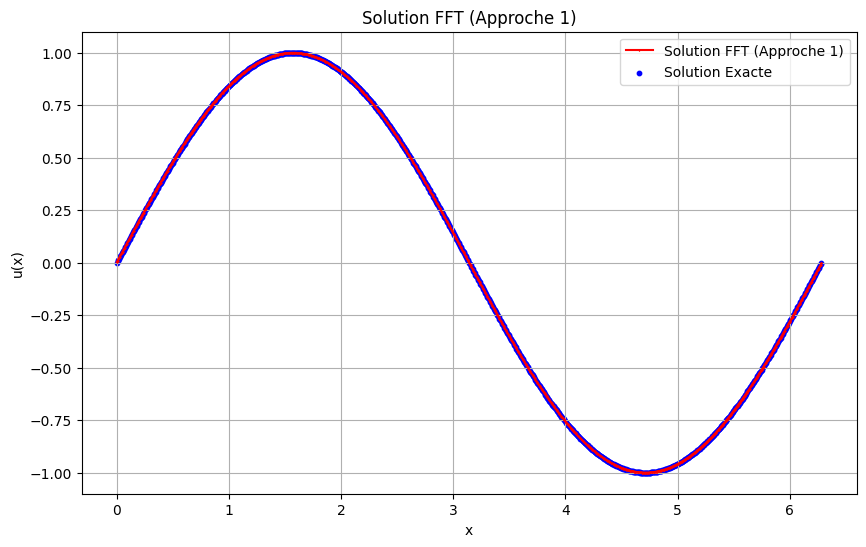

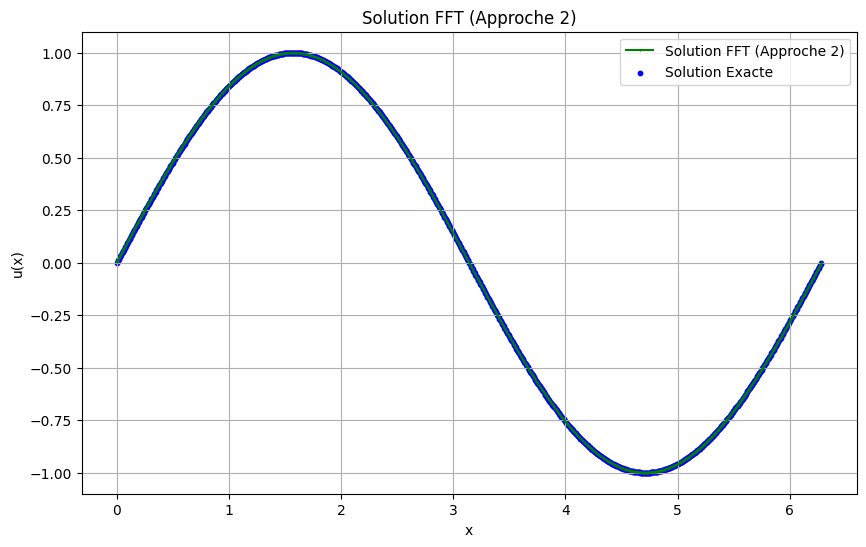

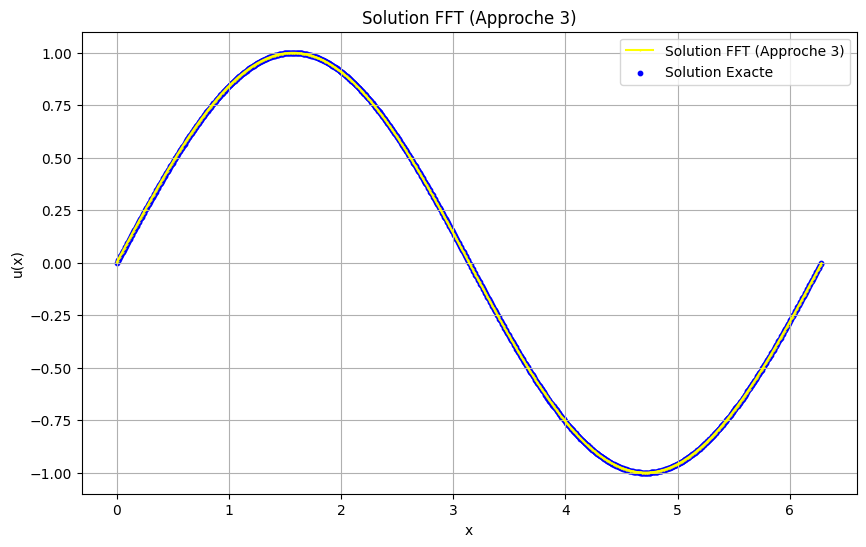

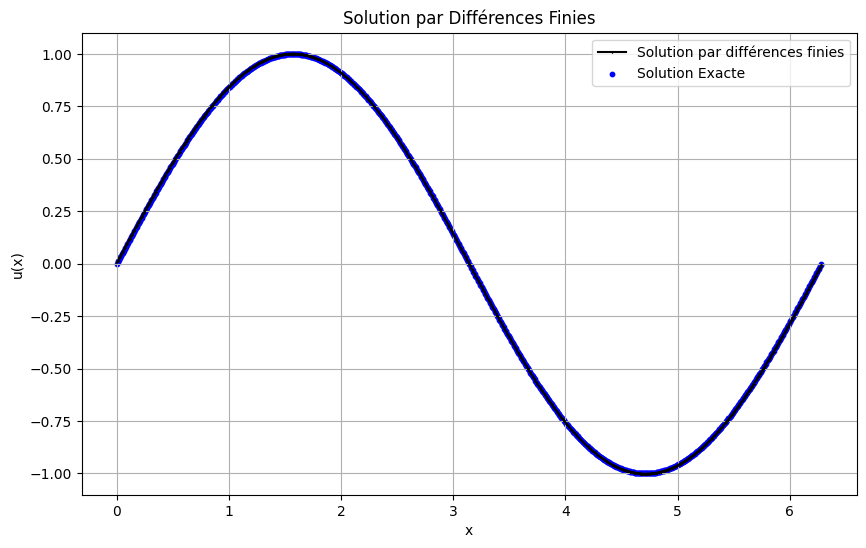

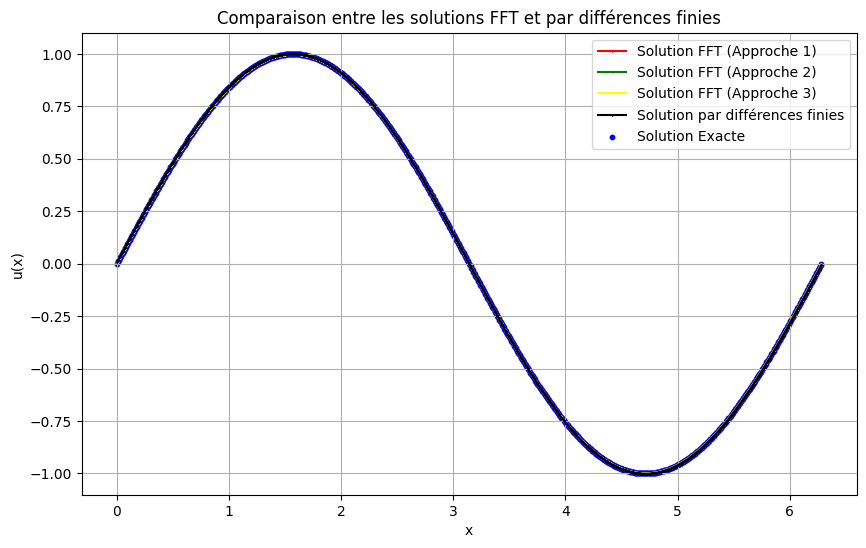

In [3]:
n = 1000           # Nombre de points
h = 2 * np.pi / (n + 1)  # Pas de discrétisation

A = (1/h**2) * (np.diag(2 * np.ones(n + 1)) - np.diag(np.ones(n), 1) - np.diag(np.ones(n), -1))
A[0, -1] = -1  # Périodicité
A[-1, 0] = -1  # Périodicité
# Définition de f
x = np.linspace(0, 2 * np.pi, n + 1)  # Points sur [0, 2π]
f = np.sin(x)

# Résolution par FFT
b_hat = np.fft.fft(f)

# Calcul des valeurs propres analytiques pour la matrice circulante
k = np.arange(0, n + 1) 
eigenvalues = (8 / h**2) * (np.sin(np.pi * k / (2 * (n + 1))))**2
# Ajout d'une petite valeur epsilon pour éviter la division par zéro
epsilon = 1e-10
eigenvalues = np.where(eigenvalues < epsilon, epsilon, eigenvalues)

# Résolution dans l'espace des fréquences
y_fft = b_hat / eigenvalues  # Division élément par élément

# Transformée inverse pour retrouver la solution dans l'espace physique
u_fft_1 = np.real(np.fft.ifft(y_fft))

# Résolution avec la méthode par différences finies
u_fd = np.linalg.solve(A, f)

# Résolution avec une approche FFT comme le cours
Coeff = np.fft.fft(f)
k = np.concatenate([np.arange(0, (n + 1) // 2), np.arange(-(n + 1) // 2, 0)])
Cfp = Coeff / (k**2)
Cfp[k == 0] = 0  # Éviter la division par zéro
u_fft_2 = np.real(np.fft.ifft(Cfp))

# methode de l'exo 1
D = np.diag(eigenvalues)

# Résolution dans l'espace des fréquences
y_fft_2 = np.linalg.solve(D, b_hat)

# Transformée inverse pour retrouver la solution dans l'espace physique
u_fft_3 = np.real(np.fft.ifft(y_fft_2))


plt.figure(figsize=(10, 6))

# Premier graphe : Solution FFT (Approche 1)
plt.figure(figsize=(10, 6))
plt.plot(x, u_fft_1, label='Solution FFT (Approche 1)', marker='*',color = 'red', markersize = 1)
plt.scatter(x, np.sin(x), label='Solution Exacte', s=10, color='blue')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution FFT (Approche 1)')
plt.grid(True)
plt.show()

# Deuxième graphe : Solution FFT (Approche 2)
plt.figure(figsize=(10, 6))
plt.plot(x, u_fft_2, label='Solution FFT (Approche 2)', marker='.', markersize=1, color = 'green')
plt.scatter(x, np.sin(x), label='Solution Exacte', s=10, color='blue')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution FFT (Approche 2)')
plt.grid(True)
plt.show()

# troisieme graphe Solution FFT (Approche 3)
plt.figure(figsize=(10, 6))
plt.plot(x, u_fft_3, label='Solution FFT (Approche 3)', marker='.', markersize=1, color = 'yellow')
plt.scatter(x, np.sin(x), label='Solution Exacte', s=10, color='blue')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution FFT (Approche 3)')
plt.grid(True)
plt.show()

# Troisième graphe : Solution par différences finies
plt.figure(figsize=(10, 6))
plt.plot(x, u_fd, label='Solution par différences finies', marker='x', markersize=1, color = 'black')
plt.scatter(x, np.sin(x), label='Solution Exacte', s=10, color='blue')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution par Différences Finies')
plt.grid(True)
plt.show()

# Quatrième graphe : Comparaison de toutes les solutions
plt.figure(figsize=(10, 6))
plt.plot(x, u_fft_1, label='Solution FFT (Approche 1)', marker='*',color = 'red', markersize = 1)
plt.plot(x, u_fft_2, label='Solution FFT (Approche 2)', marker='.', markersize=1, color = 'green')
plt.plot(x, u_fft_3, label='Solution FFT (Approche 3)', marker='.', markersize=1, color = 'yellow')
plt.plot(x, u_fd, label='Solution par différences finies', marker='x', markersize=1, color = 'black')
plt.scatter(x, np.sin(x), label='Solution Exacte', s=10, color='blue')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Comparaison entre les solutions FFT et par différences finies')
plt.grid(True)
plt.show()


# Approches FFT

Pour la FFT, nous proposons trois approches :

- **Deux premières approches :** Similaires à celles de l'exercice 1, avec une légère différence dans le calcul des valeurs propres. Ici, nous utilisons une formule analytique pour déterminer les valeurs propres.

- **Approche bonus :** Inspirée du cours, cette méthode consiste à calculer les coefficients de Fourier, résoudre l'équation dans l'espace de Fourier, puis appliquer la transformée inverse pour revenir dans l'espace physique.


C:\Users\PC\AppData\Local\Temp\ipykernel_12048\3639966619.py:34: RuntimeWarning: divide by zero encountered in divide
  Cfp = Coeff / (k**2)
C:\Users\PC\AppData\Local\Temp\ipykernel_12048\3639966619.py:34: RuntimeWarning: invalid value encountered in divide
  Cfp = Coeff / (k**2)


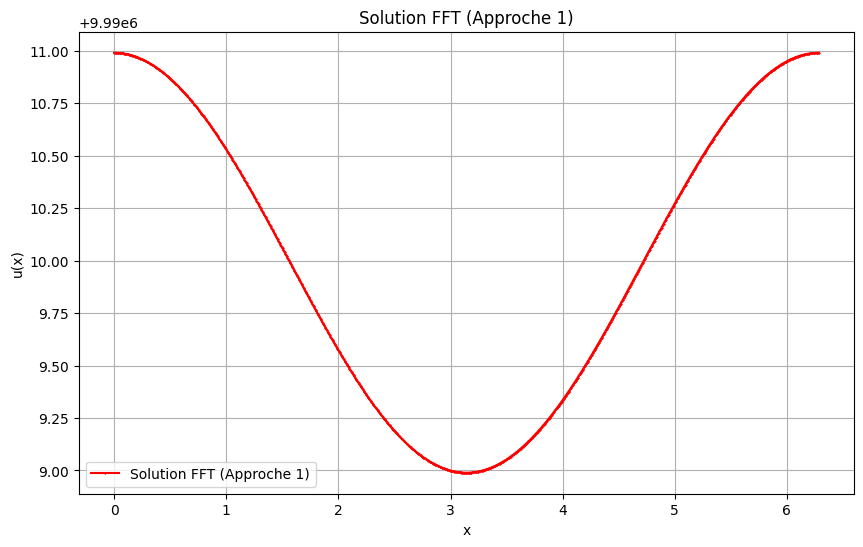

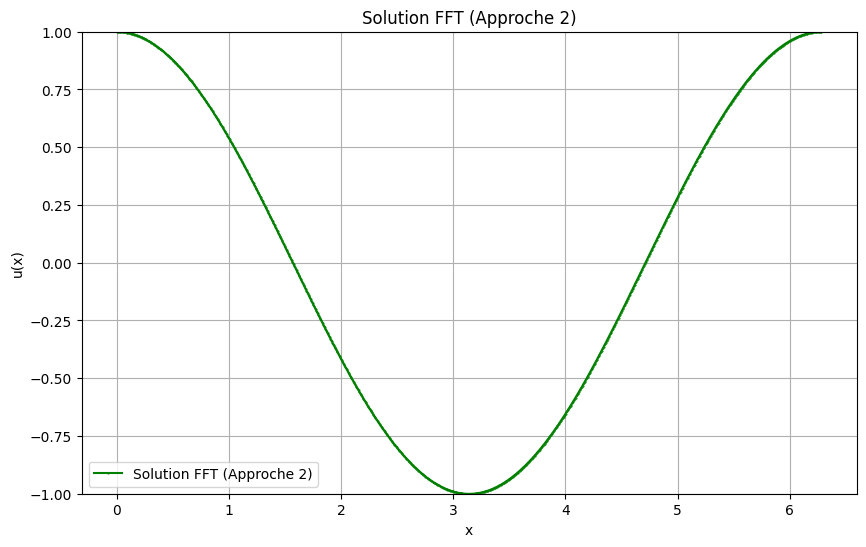

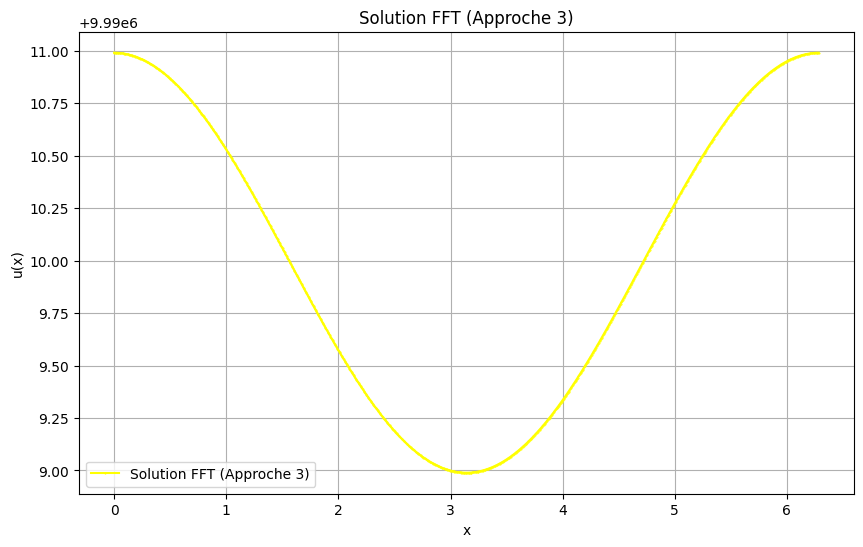

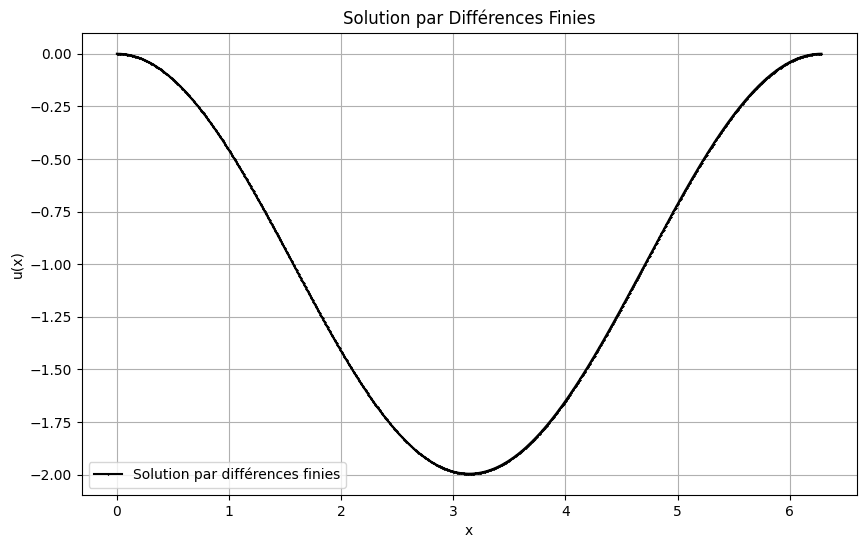

In [12]:
# Données et matrices
n = 1000           # Nombre de points
h = 2 * np.pi / (n + 1)  # Pas de discrétisation

A = (1/h**2) * (np.diag(2 * np.ones(n + 1)) - np.diag(np.ones(n), 1) - np.diag(np.ones(n), -1))
A[0, -1] = -1  # Périodicité
A[-1, 0] = -1  # Périodicité
# Définition de f
x = np.linspace(0, 2 * np.pi, n + 1)  # Points sur [0, 2π]
f = np.cos(x)

# Résolution par FFT
b_hat = np.fft.fft(f)

# Calcul des valeurs propres analytiques pour la matrice circulante
k = np.arange(0, n + 1) 
eigenvalues = (8 / h**2) * (np.sin(np.pi * k / (2 * (n + 1))))**2
# Ajout d'une petite valeur epsilon pour éviter la division par zéro
epsilon = 1e-10
eigenvalues = np.where(eigenvalues < epsilon, epsilon, eigenvalues)

# Résolution dans l'espace des fréquences
y_fft = b_hat / eigenvalues  # Division élément par élément

# Transformée inverse pour retrouver la solution dans l'espace physique
u_fft_1 = np.real(np.fft.ifft(y_fft))

# Résolution avec la méthode par différences finies
u_fd = np.linalg.solve(A, f)

# Résolution avec une approche FFT comme le cours
Coeff = np.fft.fft(f)
k = np.concatenate([np.arange(0, (n + 1) // 2), np.arange(-(n + 1) // 2, 0)])
Cfp = Coeff / (k**2)
Cfp[k == 0] = 0  # Éviter la division par zéro
u_fft_2 = np.real(np.fft.ifft(Cfp))

# methode de l'exo 1
D = np.diag(eigenvalues)

# Résolution dans l'espace des fréquences
y_fft_2 = np.linalg.solve(D, b_hat)

# Transformée inverse pour retrouver la solution dans l'espace physique
u_fft_3 = np.real(np.fft.ifft(y_fft_2))

# Premier graphe : Solution FFT (Approche 1)
plt.figure(figsize=(10, 6))
plt.plot(x, u_fft_1, label='Solution FFT (Approche 1)', marker='*', color='red', markersize=1)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution FFT (Approche 1)')
plt.grid(True)
plt.show()

# Deuxième graphe : Solution FFT (Approche 2)
plt.figure(figsize=(10, 6))
plt.plot(x, u_fft_2, label='Solution FFT (Approche 2)', marker='.', markersize=1, color='green')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.ylim(-1, 1)  # Limiter l'échelle de l'axe y
plt.legend()
plt.title('Solution FFT (Approche 2)')
plt.grid(True)
plt.show()

# Troisième graphe : Solution FFT (Approche 3)
plt.figure(figsize=(10, 6))
plt.plot(x, u_fft_3, label='Solution FFT (Approche 3)', marker='.', markersize=1, color='yellow')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution FFT (Approche 3)')
plt.grid(True)
plt.show()

# Quatrième graphe : Solution par différences finies
plt.figure(figsize=(10, 6))
plt.plot(x, u_fd, label='Solution par différences finies', marker='x', markersize=1, color='black')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution par Différences Finies')
plt.grid(True)
plt.show()

### Remarque :
Nous avons essayé d'utiliser différentes fonctions pour le second membre, comme cos(x), tan(x), ou sin(x) + cos(x). Cependant, nous rencontrons toujours le même problème : la courbe obtenue a la même forme, mais pas la même échelle sur l'axe des y. Cela pourrait être dû aux exigences imposées sur les fonctions. Autrement dit, elles doivent satisfaire les conditions périodiques, ainsi que leurs dérivées.

# Exercice 3

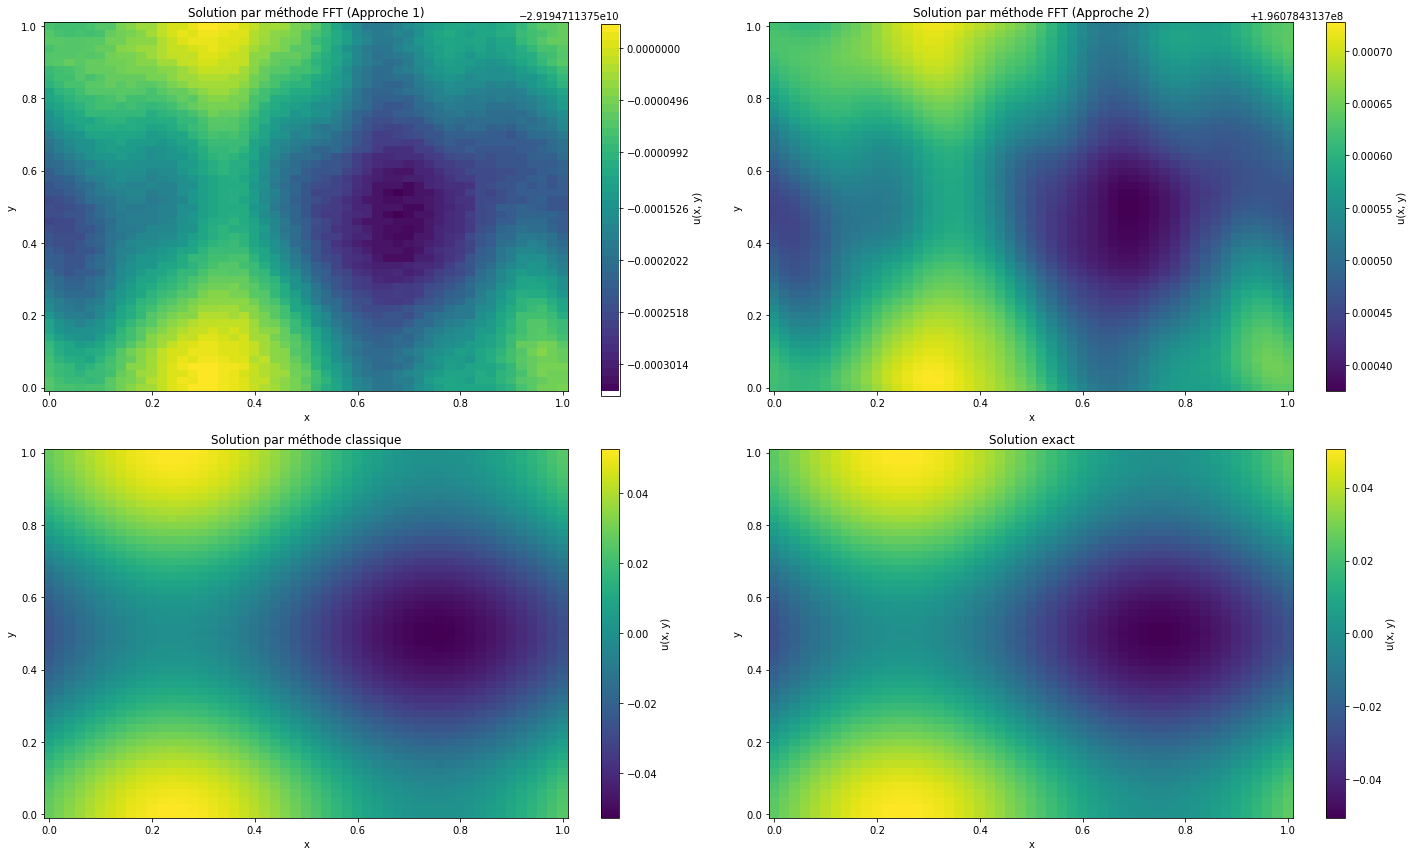

In [7]:
n = 50 # Vous pouvez ajuster n selon le besoin
N = n + 1

# Construction de la matrice T (interactions avec périodicité en 1D)
T = 4 * np.diag(np.ones(N)) - np.diag(np.ones(N - 1), -1) - np.diag(np.ones(N - 1), 1)
T[0, -1] = -1  # Périodicité à gauche-droite
T[-1, 0] = -1  # Périodicité à droite-gauche

# Initialisation de la matrice A (taille totale N*N x N*N)
A = np.zeros((N * N, N * N))

# Construire la matrice A bloc par bloc en 2D
for i in range(N):  # Parcours des blocs lignes
    for j in range(N):  # Parcours des blocs colonnes
        if i == j:  # Bloc diagonal principal : T
            A[i * N:(i + 1) * N, j * N:(j + 1) * N] = T
        elif i == j + 1 or j == i + 1:  # Sous et sur-diagonale : -I
            A[i * N:(i + 1) * N, j * N:(j + 1) * N] = -np.eye(N)

# Connecter la première et la dernière ligne pour la périodicité
A[0:N, -N:] = -np.eye(N)  # Connecter la première ligne au bas
A[-N:, 0:N] = -np.eye(N)  # Connecter la dernière ligne au haut

A = A/(1/n)**2

# Définir le vecteur f comme une fonction périodique
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
f = np.sin(2 * np.pi * X) + np.cos(2 * np.pi * Y)
f_flattened = f.flatten()  # Aplatir f 


# Appliquer la transformée de Fourier 2D à f
b_hat = np.fft.fft(f_flattened)




# Approche 1
# Calcul de la matrice pseudo-inverse
A_pinv = pinv(A)
# Calcul des valeurs propres de la matrice pseudo-inverse
eigenvalues_pinv = np.linalg.eigvals(A_pinv)
# Calcul des valeurs propres de la matrice d'origine
valeurs_propres_pinv = 1 / eigenvalues_pinv

# Approche 2
# Calcul direct des valeurs propres
valeurs_propres = np.linalg.eigvals(A)

# Un petit terme pour éviter la division par zéro
epsilon = 1e-10
valeurs_propres_pinv = np.where(valeurs_propres_pinv < epsilon, epsilon, valeurs_propres)
valeurs_propres = np.where(valeurs_propres < epsilon, epsilon, valeurs_propres)


# Résolution dans l'espace des fréquences
# Appliquer la solution dans l'espace des fréquences
y_fft_pinv = b_hat / valeurs_propres_pinv
y_fft = b_hat / valeurs_propres #np.linalg.solve(D, b_hat.flatten())  

# Transformée inverse pour retrouver la solution dans l'espace physique
u_fft_pinv = np.real(np.fft.ifft(y_fft_pinv))  # Reshaper la solution 
u_fft = np.real(np.fft.ifft(y_fft))  

# Résolution classique du système
# Utilisation de la pseudo-inverse pour résoudre
u_pinv = pinv(A) @ f_flattened


# Plot de la comparaison des trois méthodes
plt.figure(figsize=(20, 12))

# Solution par FFT (Approche 1)
plt.subplot(2, 2, 1)
plt.title('Solution par méthode FFT (Approche 1)')
plt.pcolormesh(X, Y, u_fft_pinv.reshape(N, N), shading='auto')
plt.colorbar(label='u(x, y)')
plt.xlabel('x')
plt.ylabel('y')

# Solution par FFT (Approche 2)
plt.subplot(2, 2, 2)
plt.title('Solution par méthode FFT (Approche 2)')
plt.pcolormesh(X, Y, u_fft.reshape(N, N), shading='auto')
plt.colorbar(label='u(x, y)')
plt.xlabel('x')
plt.ylabel('y')

# Solution par méthode classique
plt.subplot(2, 2, 3)
plt.title('Solution par méthode classique')
plt.pcolormesh(X, Y, u_pinv.reshape(N, N), shading='auto')
plt.colorbar(label='u(x, y)')
plt.xlabel('x')
plt.ylabel('y')


# Solution par méthode classique
plt.subplot(2, 2, 4)
plt.title('Solution exact')
plt.pcolormesh(X, Y, f / (4 * np.pi**2), shading='auto')
plt.colorbar(label='u(x, y)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()
